# INFO 370 PS5
*Name: Brian Park*

List your collaborators here:
1. Jae Sang Woo

In [1028]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## 1. When will we hit 2C of global warming?

1. (1pt) Load data. Ensure it looks good.
2. (2pt) Make a plot of the temperature anomaly for all years in the dataset. Describe what you see–how has global temperature behaved through the last 170 years? Hint: you may want to rename the data variables to something simpler

In [1029]:
#1-1
df = pd.read_csv("../data/hadcrut-5.0.1.0-annual.csv.bz2", sep=",")
dfCrut = df.rename(columns = {'Anomaly (deg C)': 'Anomaly',
                             'Lower confidence limit (2.5%)': 'LowerCL',
                             'Upper confidence limit (97.5%)': 'UpperCL'}, 
                   inplace = False)
dfCrut.head()

,Time,Anomaly,LowerCL,UpperCL
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


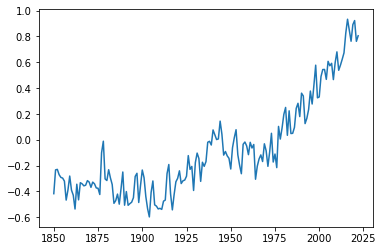

In [1030]:
#1-2
_ = plt.plot('Time', 'Anomaly', data = dfCrut)

According to the plot above, the global temperature has continually increased overall over the last 170 years.

1. (2pt) Compute the baseline anomaly (for 1850-1900).
2. (3pt) Make a plot that shows the last 60 years of data, overlied with the regression line. In your opinion–does the regression line describe the trend well? Hint: you can add regression line to the plot with matplotlib, but I recommend you to check out sns.regplot instead.
3. (2pt) But we have a problem with these data–the anomaly figures reported there are computed w.r.t. the 1961-1990 period. Create a new variable that describes the temperature anomaly above the pre-industrial baseline that you computed above in Q1.1. Hint: should be -0.06 in year 1850.
4. (4pt) Estimate a linear regression model where you describe the anomaly (measured above baseline in q3) as a function of years. How large is R2? What does this number tell you? Note: in terms of interpeting the coefficients below, I recommend to use years relative to 2000, i.e. 1999 = −1, 2000 = 0, 2001 = 1 etc.
5. (4pt) Interpret the coefficients. What does the slope mean? Is it statistically significant?
6. (6pt) What does the intercept mean if (a) you use years as is (1999, 2000, 2001, . . . )? (b) you use years relative to 2000 (-1, 0, 1, . . . )? Is it statistically significant? 
7. (4pt) Use the intercept and slope, and compute how much above the pre-industrial baseline is the world now, in 2022.
8. (9pt) Now use the slope and intercept to find which year will the trend hit 1.5C, and when will it hit 2C. Hint: we should hit 1.5 degrees ∼ 2038, and 2C around the time of your retirement.
9. (4pt) Now think about these two threshold years you computed. What do you think, might the thresholds be actually crossed earlier or later than what you computed, or maybe not at all? What does it depend on? Can you improve your model to make your predictions better?

In [1031]:
#1-1
dfF50 = dfCrut[dfCrut['Time'] <= 1900]
bLine = np.mean(dfF50['Anomaly'])
bLine

-0.3565021707254903

The baseline anomaly from 1850 to 1900 is about -0.3565°C.

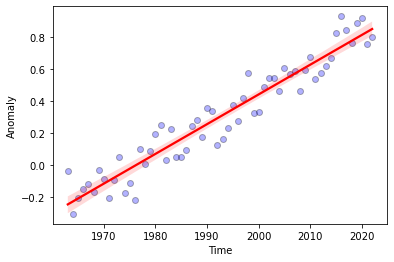

In [1032]:
#1-2
dfL60 = dfCrut[dfCrut['Time'] >= (np.max(dfCrut['Time']) - 59)]

_ = sns.regplot(x = "Time", y = "Anomaly", scatter_kws = {"color":"blue", 
                                                          "alpha":0.3, 
                                                          "edgecolor":"black"},
                line_kws={"color":"red"}, data=dfL60)
_ = plt.show()

The regression line well describes an upward trend and the dots are aligned well along the regression line.

In [1033]:
#1-3
dfCrut["aboveBLine"] = dfCrut["Anomaly"] - bLine
dfCrut.head()

,Time,Anomaly,LowerCL,UpperCL,aboveBLine
0,1850,-0.417659,-0.589203,-0.246115,-0.061157
1,1851,-0.233350,-0.411868,-0.054832,0.123152
2,1852,-0.229399,-0.409382,-0.049416,0.127103
3,1853,-0.270354,-0.430009,-0.110700,0.086148
4,1854,-0.291630,-0.432824,-0.150436,0.064872


In [1034]:
#1-4
dfCrut["diffTime"] = dfCrut["Time"] - 2000
dfL60 = dfCrut[dfCrut['Time'] >= (np.max(dfCrut['Time']) - 59)]
m = smf.ols("aboveBLine ~ diffTime", data = dfL60).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             aboveBLine   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.80e-33
Time:                        05:36:26   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7996      0.014     58.663      0.000       0.772       0.827
diffTime       0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 is 0.920, indicating that 92% of the explanatory validity of the variance of the dependent variable is explained by the variance of the independent variable. R2 simply means that this model has 92% explanatory power. The higher the R2 value is, the closer the data is aligned with the regression line.

In [1035]:
#1-5-β0

0.7996 (β0 coefficient) represents that the temperature anomaly above the pre-industrial baseline increases by 0.7996°C in the year 2000. It is statistically significant because its p-value is less than 5%.

In [1036]:
#1-5-β1-slope

With each passing year, the temperature anomaly above the pre-industrial baseline increases by 0.0186°C. It is statistically significant because its p-value is less than 5%.

In [1037]:
#1-6-a
m = smf.ols("aboveBLine ~ Time", data = dfL60).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             aboveBLine   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.80e-33
Time:                        05:36:26   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.4592      1.439    -25.335      0.000     -39.340     -33.578
Time           0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-36.4592 (β0 coefficient) represents that the temperature anomaly above the pre-industrial baseline decreased by 36.4592°C in the year 0. It is statistically significant because its p-value is less than 5%.

In [1038]:
#1-6-b
m = smf.ols("aboveBLine ~ diffTime", data = dfL60).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             aboveBLine   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.80e-33
Time:                        05:36:26   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7996      0.014     58.663      0.000       0.772       0.827
diffTime       0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.7996 (β0 coefficient) represents that the temperature anomaly above the pre-industrial baseline increases by 0.7996°C in the year 2000. It is statistically significant because its p-value is less than 5%.

In [1039]:
#1-7
def temp(diff):
    hatC = 0.7996 + (diff * 0.0186)
    return hatC
temp(2022 - 2000)

1.2087999999999999

In [1040]:
#1-8
def year(temp):
    return 2000 + ((temp - 0.7996) / 0.0186)
year(1.5), year(2)

(2037.6559139784947, 2064.537634408602)

In 2038, it will hit 1.5°C. In 2065, it will hit 2°C.

In [1041]:
#1-9

This is just the model predicting the temperature growth in the future based on the data we have so far. I believe that if we bring this model within multiple regression with more possible variables affecting the tempearture growth, the two thresholds will be crossed earlier as global warming is worsening. Also, I think that analyzing the model with more other variables will bring more accurate predictions.

## 2. How Is Basketball Game Score Calculated? 

1. (1pt) Load data (harden-21-22.csv). Do basic checks.
2. (3pt) These data also include games where he did not play. Find how many games did 4 James Harden actually play in this season. Hint: there are no general ways how to do this. But just look at the data and figure it out based on what do you see there. It can be coded in different ways, but first you have to see how the relevant data looks like.
3. (5pt) Clean the data and ensure the relevant variables are of numeric type so we can use those in the regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues. Hint: a good way to transform text to number is pd.to_numeric. Hint 2: you do not have to convert variables you are not using.
4. (6pt) Analyze the game score GmSc. What is its distribution? Which distribution does the histogram resemble? Range? Mean? Standard deviation?
5. (7pt) First, let’s run a simple regression model explaining game score GmSc by field goal attempts FGA: GmScg = β0 + β1 · FGAg + ϵg (1) where g indexes games. Display the results and answer the following questions: (a) What is the interpretation of Intercept (β0)? (b) What is the interpretation of FGA (β1)? Is it statistically significant?
6. (10pt) Next, let’s analyse how is game score related to field goals (FG) and field goal attempts (FGA). Estimate the model GmScg = β0 + β1 · FGg + β2 · FGAg + ϵg. (2) If done correctly, you should see results approximately 9.0, 3.0, -0.6 here. Answer the following questions: (a) What is the interpretation of FG? Is it statistically significant? (b) What is the interpretation of FGA (β2)? Is it statistically significant? (c) How do you explain the fact that model 1 shows positive and model 2 shows a negative estimate for FGA? There is a very easy an intuitive explanation that everyone will understand, including those who have no clue about stats. Can you phrase it in that way? Hint: try to understand what exactly is the difference between interpreting slope for  simple regression and multiple regression. (d) What is the R 2 of the model? How does it compare to the model 1? What do you conclude from this comparison?
7. (7pt) Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results. Answer the following questions: (a) How do standard errors and t-values look like in this model? (b) What is R 2 of this model? What does it tell you about how game score is calculated? (c) What do the results tell about turnover (TOV )? Is it good or bad for the team? Suggestion: check out patsy Q() quoting to include non-valid variable names.
8. (6pt) Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/ game-score/. Did you recover the same formula?

In [1042]:
#2-1
dfHD = pd.read_csv("../data/harden-21-22.csv.bz2", sep=",")
dfHD.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12


In [1043]:
#2-2
dfHD.shape[0] - dfHD[dfHD["GS"] != "1"].shape[0]

65

I considered the variable GS that has no "1"s as those games that James Harden did not play. After computation, I found 18 games that James Harden did not play. Therefore, he played only 65 games out of 83 games.

In [1044]:
#2-3
dfHD = dfHD[dfHD["GS"] == "1"]
dfHD.GmSc = pd.to_numeric(dfHD.GmSc, errors = 'ignore')
dfHD.FGA = pd.to_numeric(dfHD.FGA, errors = 'ignore')
dfHD.FG = pd.to_numeric(dfHD.FG, errors = 'ignore')

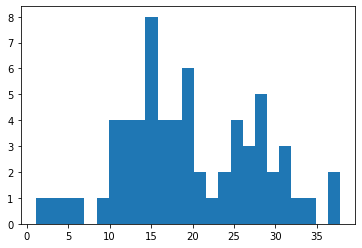

In [1045]:
#2-4
_ = plt.hist(dfHD.GmSc, bins = 25)

The histogram is fairly similar to a normal distribution with the highest peak in the center.

In [1046]:
#2-4
ranges = (np.min(GmSc), np.max(GmSc))
mean = np.mean(GmSc)
std = np.std(GmSc)
ranges, mean, std

((1.1, 37.8), 19.61384615384615, 8.168944511861358)

In [1047]:
#2-5
m = smf.ols("GmSc ~ FGA", data = dfHD).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Mon, 14 Nov 2022   Prob (F-statistic):            0.00280
Time:                        05:36:26   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1048]:
#2-5-a-β0

James Harden scored 8.8748 points when he had no attempts for field goals.

In [1049]:
#2-5-b

James Harden scored 0.7037 more points for every field goal attempt. It is statistically significant because its p-value is less than 0.05.

In [1050]:
#2-6
m = smf.ols("GmSc ~ FG + FGA", data = dfHD).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           7.49e-13
Time:                        05:36:26   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1051]:
#2-6-a

James Harden with one more field goal scores 3.0427 points more if the number of field goal attempts remains the same. It is statistically significant because its p-value is very close to 0 and less than 0.05.

In [1052]:
#2-6-b

James Harden with one more field goal attempt scores 0.5523 points less if the number of field goals remains the same. It is statistically significant because its p-value is very close to 0 and less than 0.05.

In [1053]:
#2-6-c

When the FGA variable is modeled within multiple regression, some other variables or FG may be correlated with the FGA, which may lead model 2 to have a negative estimate for FGA.

In [1054]:
#2-6-d

The R2 of model 1 is 0.133 whereas the R2 of model 2 is 0.594. Model 2 has a higher R2 than model 1. The R2 of model 2 represents that 59.4% of the explanatory validity of the variance of the dependent variable is explained by the variance of the independent variable while the R1 of model 1 represents that 13.3% of the explanatory validity of the variance of the dependent variable is explained by the variance of the independent variable. Therefore, in other words, model 2 simply has more explanatory power compared to model 1.

In [1055]:
#2-7
dfHD["3P"] = pd.to_numeric(dfHD["3P"], errors = 'ignore')
dfHD["3PA"] = pd.to_numeric(dfHD["3PA"], errors = 'ignore')
dfHD.FT = pd.to_numeric(dfHD.FT, errors = 'ignore')
dfHD.FTA = pd.to_numeric(dfHD.FTA, errors = 'ignore')
dfHD.ORB = pd.to_numeric(dfHD.ORB, errors = 'ignore')
dfHD.DRB = pd.to_numeric(dfHD.DRB, errors = 'ignore')
dfHD.AST = pd.to_numeric(dfHD.AST, errors = 'ignore')
dfHD.STL = pd.to_numeric(dfHD.STL, errors = 'ignore')
dfHD.BLK = pd.to_numeric(dfHD.BLK, errors = 'ignore')
dfHD.TOV = pd.to_numeric(dfHD.TOV, errors = 'ignore')
dfHD.PF = pd.to_numeric(dfHD.PF, errors = 'ignore')

m = smf.ols("GmSc ~ FG + FGA + Q('3P') + Q('3PA') + FT + FTA + ORB + DRB + \
            AST + STL + BLK + TOV + PF", data = dfHD).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.998e+30
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:36:27   Log-Likelihood:                 2007.5
No. Observations:                  65   AIC:                            -3987.
Df Residuals:                      51   BIC:                            -3957.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e-14    9.3e-15      3.249      0.002    1.15e-14    4.89e-14
FG             2.4000   9.09e-16   2.64e+15      0.000       2.400       2.400
FGA           -0.7000   6.01e-16  -1.17e+15      0.000      -0.700      -0.700
Q('3P')        1.0000   1.56e-15   6.42e+14      0.000       1.000       1.000
Q('3PA')   -1.193e-15   1.02e-15     -1.167      0.249   -3.25e-15    8.59e-16
FT             1.4000   1.73e-15   8.07e+14      0.000       1.400       1.400
FTA           -0.4000   1.43e-15  -2.79e+14      0.000      -0.400      -0.400
ORB            0.7000   1.31e-15   5.36e+14      0.000       0.700       0.700
DRB            0.3000   6.16e-16   4.87e+14      0.000       0.300       0.300
AST            0.7000   4.96e-16   1.41e+15      0.000       0.700       0.700
STL            1.0000   1.41e-15   7.08e+14      0.000       1.000       1.000
BLK            0.7000   1.99e-15   3.51e+14      0.000       0.700       0.700
TOV           -1.0000   8.34e-16   -1.2e+15      0.000      -1.000      -1.000
PF            -0.4000    1.1e-15  -3.65e+14      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                1.075
Skew:                          -0.196   Prob(JB):                        0.584
Kurtosis:                       2.507   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1056]:
#2-7-a

In this model, all standard errors are very small values whereas most t values are very large numbers. This shows that the model is less likely to have errors and most variables are statistically significant.

In [1057]:
#2-7-b

The R2 of this model is 1, meaning that the relationship between the model and its dependent variables is highly correlated. 1 is a very surprising result because it has 100% explanatory power and is considered to be highly reliable. Applying to game score, Harden's game score (GmSc) is highly reliable computed by different numerical variables.

In [1058]:
#2-7-c

TOV is bad for the team because the model shows that Harden scored 1 point less with every turnover.

In [1059]:
#2-8
def Gmsc():
    GmSc = (B0) + 0.4 * (FG) + 0.7 * (ORB) + 0.3 * (DRB) + (STL) + \
    0.7 * (AST) + 0.7 * (BLK) - 0.7 * (FGA) - 0.4 * (FTA) - 0.4 * (PF) - (TOV)
    return GmSc

I almost recovered the same formula except for FG which has a different value of the coefficient.

## 3. Interpret regression results in the literature

1. (3pt) Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?
2. (3pt) What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant?
3. (3pt) How is Financial distress related to mental health? Is the effect statistically significant?

In [1060]:
#3-1

Yes, those with a partner have a 0.47 decrease in PHQ-9, indicating better mental health. It is not statistically significant because its p-value is greater than 0.05.

In [1061]:
#3-2

People affected by COVID exposure have a 0.24 increase in PHQ-9, representing that it is worsening mental health. This effect is not also statistically significant because its p-value is greater than 0.05.

In [1062]:
#3-3

Financial distress is surely related to mental health because people having financial distress have a 2.32 increase in PHQ-9, worsening mental health. This effect is statistically significant because its p-value is less than 0.05.

### Finally tell us how many hours did you spend on this PS.

I spent 9 hours on this PS.